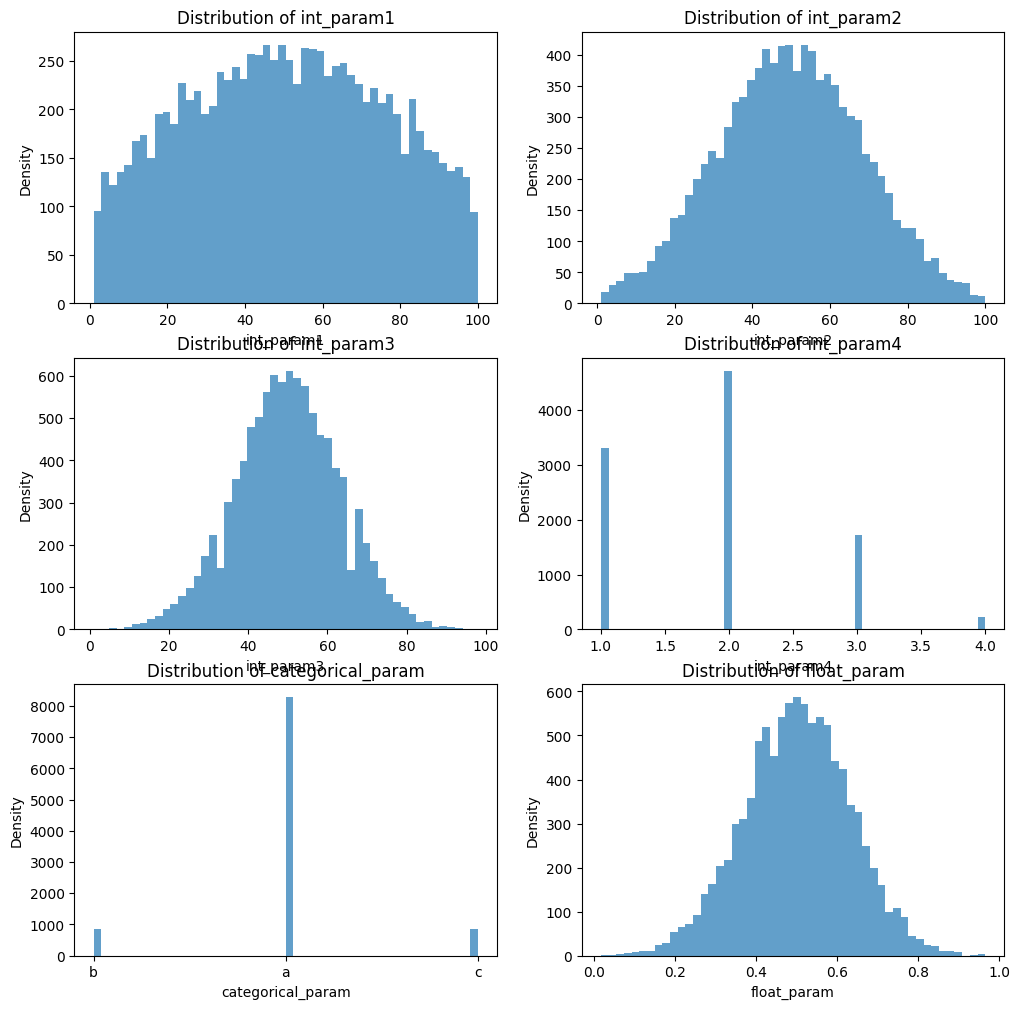

In [ ]:
"""
This example demonstrates the full capabilities of NePS Spaces
by defining a neural network architecture using PyTorch modules.
It showcases how to interact with the NePS Spaces API to create,
sample and evaluate a neural network pipeline.
It also demonstrates how to convert the pipeline to a callable
and how to run NePS with the defined pipeline and space.
"""

import numpy as np
import torch
import torch.nn as nn
import neps
from neps.space.neps_spaces.parameters import PipelineSpace, Operation, Categorical, Resampled
from neps.space.neps_spaces import sampling
from neps.space.neps_spaces import neps_space

# Define the NEPS space for the neural network architecture
class SimpleSpace(PipelineSpace):
    int_param1 = neps.Integer(1,100, prior=50, prior_confidence="low")
    int_param2 = neps.Integer(1,100, prior=50, prior_confidence="medium")
    int_param3 = neps.Integer(1,100, prior=50, prior_confidence="high")
    int_param4 = neps.Integer(1,4, prior=1.5, prior_confidence="low")
    categorical_param = Categorical(("a", "b", "c"), prior=0, prior_confidence="high")
    float_param = neps.Float(0, 1.0, prior=0.5, prior_confidence="high")

# Sampling and printing one random configuration of the pipeline
pipeline = SimpleSpace()
random_sampler = sampling.RandomSampler({})
sampler = sampling.PriorOrFallbackSampler(fallback_sampler=random_sampler, always_use_prior=False)

values = {"int_param1": [],
          "int_param2": [], "int_param3": [], "int_param4": [], 
          "categorical_param": [], "float_param": []}
for i in range(10000):
    resolved_pipeline, resolution_context = neps_space.resolve(pipeline,domain_sampler=sampler)

    # s = resolved_pipeline.int_param1
    # print(resolved_pipeline.get_attrs())
    values["int_param1"].append(resolved_pipeline.int_param1)
    values["int_param2"].append(resolved_pipeline.int_param2)
    values["int_param3"].append(resolved_pipeline.int_param3)
    values["int_param4"].append(resolved_pipeline.int_param4)
    values["categorical_param"].append(resolved_pipeline.categorical_param)
    values["float_param"].append(resolved_pipeline.float_param)

# Plot the distribution of the sampled values, each in a separate subplot
import matplotlib.pyplot as plt
_, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()
for i, (param_name, param_values) in enumerate(values.items()):
    axs[i].hist(param_values,align='mid',bins=50,alpha=0.7)
    axs[i].set_title(f'Distribution of {param_name}')
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Density')
plt.show()


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import neps
from neps.space.neps_spaces.parameters import Pipeline, Operation, Categorical, Resampled
from neps.space.neps_spaces import sampling
from neps.space.neps_spaces import neps_space
from functools import partial

# Define the NEPS space for the neural network architecture
class SimpleSpace(PipelineSpace):
    int_param1 = neps.Integer(1,100)#, prior=50, prior_confidence="low")
    # int_param2 = neps.Integer(1,100, prior=50, prior_confidence="medium")
    # int_param3 = neps.Integer(1,100, prior=50, prior_confidence="high")
    # int_param4 = neps.Integer(1,3, prior=2, prior_confidence="low")
    # categorical_param = Categorical(("a", "b", int_param1))
    # float_param = neps.Float(0, 1.0, prior=0.5, prior_confidence="high")
    fidelity_param = neps.Fidelity(neps.Integer(1, 10))

# Sampling and printing one random configuration of the pipeline
pipeline = SimpleSpace()

def evaluate_pipeline(int_param1,**_args):#, fidelity_param, categorical_param):
    return int_param1

for i in range(1):
    # resolved_pipeline, resolution_context = neps_space.resolve(pipeline,domain_sampler=sampler)
    new_rs=neps.algorithms.NePSRandomSearch(pipeline,ignore_fidelity=True)
    # old_rs=neps.algorithms.random_search(pipeline,ignore_fidelity=True)
    # print(new_rs({},None))

    # s = resolved_pipeline.int_param1
    # print(resolved_pipeline.get_attrs())
    import logging

    logging.basicConfig(level=logging.INFO)
    neps.run(evaluate_pipeline,pipeline,root_directory="results/fidelity_ignore_test",overwrite_working_directory=True,optimizer=neps.algorithms.neps_priorband, max_evaluations_total=1)
    neps.status("results/fidelity_ignore_test",print_summary=True, pipeline_space_variables=(SimpleSpace(),["int_param1", "fidelity_param"]))

INFO:neps.api:Starting neps.run using root directory results/fidelity_ignore_test
INFO:neps.runtime:Overwriting optimization directory 'results\fidelity_ignore_test' as `overwrite_optimization_dir=True`.
INFO:neps.runtime:Launching NePS
INFO:neps.runtime:Worker '20016-2025-07-11T18:31:10.131893+00:00' sampled new trial: 1_0.
INFO:neps.state.pipeline_eval:Successful evaluation of '1_0': 68.
INFO:neps.runtime:Worker '20016-2025-07-11T18:31:10.131893+00:00' evaluated trial: 1_0 as State.SUCCESS.
INFO:neps.runtime:The total number of evaluations has reached the maximum allowed of `self.settings.max_evaluations_total=1`. To allow more evaluations, increase this value or use a different stopping criterion.
INFO:neps.api:The post run summary has been created, which is a csv file with the output of all data in the run.
You can find a full dataframe at: C:\Users\Amega\Git\neps\neps_examples\basic_usage\results\fidelity_ignore_test\summary\full.csv.
You can find a quick summary at: C:\Users\Ameg

# Configs: 1

    success: 1

# Best Found (config 1_0):

    objective_to_minimize: 68.0
    config: int_param1
        (68)
        	01 :: 68
    config: fidelity_param
        (1)
        	01 :: 1
    path: C:\Users\Amega\Git\neps\neps_examples\basic_usage\results\fidelity_ignore_test\configs\config_1_0
